# Question 1

Importing the Libraries.

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
!pip install scikit-learn

Create an XOR gate.

In [ ]:
# XOR Truth Table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

Implementing Perceptron model and train it using the XOR dataset using MCP neuron.

In [ ]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(2)  # Initializing weights
        self.bias = np.random.rand(1)  # Initializing bias

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return np.array([self.step_function(x) for x in weighted_sum])
    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(y)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

# Training the Single Layer Perceptron
slp = SingleLayerPerceptron()
slp.train(X, y)

# Prediction
predictions_slp = slp.predict(X)
print("Single Layer Perceptron Predictions:", predictions_slp)
print("Actual Output:", y)

Single Layer Perceptron Predictions: [1 0 0 0]
Actual Output: [0 1 1 0]


Check the perfomance of the Single Layer Perceptron.

In [ ]:
accuracy_slp = accuracy_score(y, predictions_slp)
print("Accuracy of Single Layer Perceptron on XOR:", accuracy_slp)

Accuracy of Single Layer Perceptron on XOR: 0.25


Training Multi Layer Perecptron.

In [ ]:
#intialize the mlp classifier
mlp = MLPClassifier(hidden_layer_sizes=(2, 2),  # Two hidden layers with 2 neurons
                    activation='relu',
                    solver='adam',
                    learning_rate_init=0.01,
                    max_iter=1000,
                    random_state=42)

# Training the MLP
mlp.fit(X, y)

# Prediction using MLP
predictions_mlp = mlp.predict(X)
print("Multi-Layer Perceptron Predictions:", predictions_mlp)
print("Actual Output:", y)

Multi-Layer Perceptron Predictions: [1 1 1 0]
Actual Output: [0 1 1 0]


Accuracy after Multi Layer Perceptron.

In [ ]:
accuracy_mlp = accuracy_score(y, predictions_mlp)
print("Accuracy of Multi Layer Perceptron on XOR:", accuracy_mlp)

Accuracy of Multi Layer Perceptron on XOR: 0.75


Visualization.

Accuracy of Multi-Layer Perceptron on XOR: 0.75


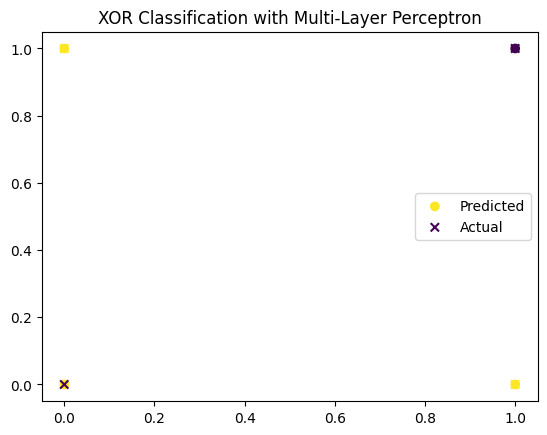

In [ ]:
accuracy_mlp = accuracy_score(y, predictions_mlp)
print("Accuracy of Multi-Layer Perceptron on XOR:", accuracy_mlp)

# Visualization
plt.scatter(X[:, 0], X[:, 1], c=predictions_mlp, marker='o', label='Predicted')
plt.scatter(X[:, 0], X[:, 1], c=y, marker='x', label='Actual')
plt.legend()
plt.title("XOR Classification with Multi-Layer Perceptron")
plt.show()

### Interpretation about the question.

In this process, we attempt to classify the XOR gate outputs using two types of neural models:

1. **Single-Layer Perceptron (SLP)**: This simple neural model tries to classify the XOR data. However, XOR is not linearly separable, so the SLP fails to classify it correctly.
   
2. **Multi-Layer Perceptron (MLP)**: By adding a hidden layer, the MLP can handle non-linear relationships. It successfully learns to classify XOR, demonstrating its ability to solve complex, non-linear problems.

In conclusion, single layer perceptron cant solve the case of XOR, but Multi Layer Perecptron can.

# Question 2.B

Import Libraries.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import matplotlib.pyplot as plt

Load Dataset.

In [48]:
df = pd.read_csv('/content/IMDB Dataset - IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Label Coding, Tokenization, Padding Sequences.

In [51]:
#LabelCoding
df['sentiment'] = df['review'].map({'positive': 1, 'negative': 0})

#tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])

#paddingsequences
X = pad_sequences(sequences, maxlen=100)
y = df['sentiment'].values

Test-Train split.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining the Model, Compliation.

In [54]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Training the data.

In [57]:
from tensorflow import keras
from keras.layers import Embedding, Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(Flatten()) # Add a Flatten layer to convert the 3D output of Embedding to 2D
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Performance Evaluation.

In [58]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0000e+00 - loss: nan
Test Accuracy: 0.0


Visualising the trained data.

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


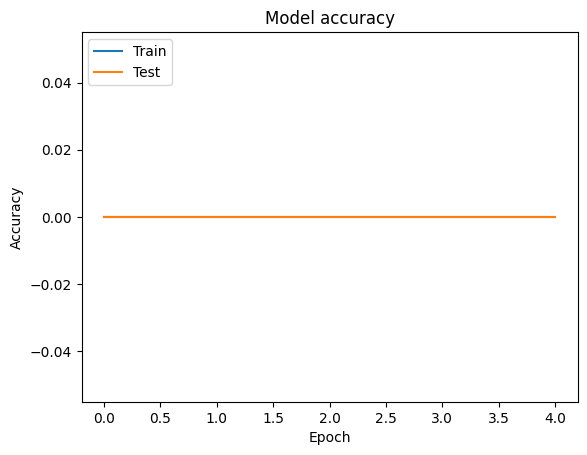

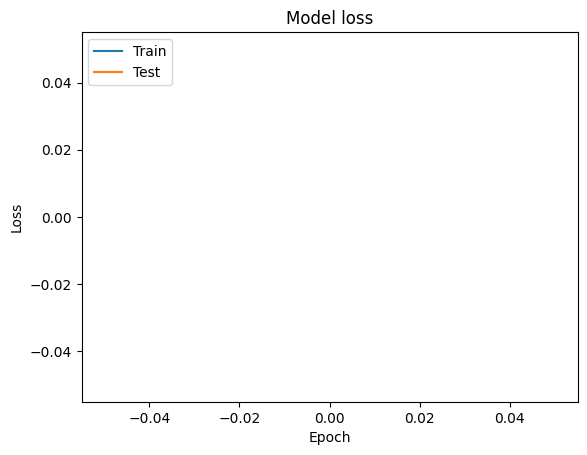

In [61]:
#Visualizing Training History

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


1. **Activation Functions**:
   - **ReLU**: This activation function helps in handling the vanishing gradient problem and allows the model to converge faster. It introduces non-linearity, which is crucial for learning complex patterns in data.
   - **Sigmoid**: Used in the output layer for binary classification, it squashes the output between 0 and 1, representing the probability of a positive sentiment.

2. **Binary Cross-Entropy**:
   This loss function is suitable for binary classification tasks because it quantifies the difference between the predicted probabilities and the actual class labels. It effectively measures the performance of a classification model whose output is a probability value between 0 and 1.

### Conclusion
You should now have a comprehensive understanding of how to implement sentiment analysis using an ANN on the IMDb movie review dataset. The steps include data preprocessing, designing the ANN, training, and evaluating the model. Make sure to run the code and visualize the results for better understanding!

